### Check the basins in the HMA region.

In [2]:
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.feature as cfeature

In [3]:
path_basins_vörösmarty2010 = 'data/hma-extent/basins/asia_Vörösmarty2010_6min.gpkg'  
path_basins_lehner2013_l3 = 'data/hma-extent/basins/hma_Lehner2013_levels/hma_hybas_as_lev03_v1c.gpkg'  ### HydroSHEDS dataset
path_basins_lehner2013_l4 = 'data/hma-extent/basins/hma_Lehner2013_levels/hma_hybas_as_lev04_v1c.gpkg'  ### HydroSHEDS dataset
path_basins_lehner2013_l5 = 'data/hma-extent/basins/hma_Lehner2013_levels/hma_hybas_as_lev05_v1c.gpkg'  ### HydroSHEDS dataset
path_hma_gtng = 'data/hma-extent/HMA/hma_gtng_202307_subregions.gpkg'



In [4]:
### read hma extent data
hma_gtng = gpd.read_file(path_hma_gtng)
hma_gtng_merged = hma_gtng.dissolve()
## read basins data
hma_basins_vörösmarty2010 = gpd.read_file(path_basins_vörösmarty2010)
hma_basins_lehner2013_l3 = gpd.read_file(path_basins_lehner2013_l3)
hma_basins_lehner2013_l4 = gpd.read_file(path_basins_lehner2013_l4)
hma_basins_lehner2013_l5 = gpd.read_file(path_basins_lehner2013_l5)
# hma_gtng_merged
hma_basins_lehner2013_l3.head(2)


,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,4030007850,0,4030007850,4030007850,0.0,0.0,962987.4,962987.4,432,0,0,1,6,"MULTIPOLYGON (((112.2125 39.7125, 112.20612 39..."
1,4030009880,0,4030009880,4030009880,0.0,0.0,1924624.7,1924624.7,434,0,0,1,8,"MULTIPOLYGON (((112.38333 25.15417, 112.38333 ..."


#### hma basins from different data

Text(0.5, 1.0, 'hma basins')

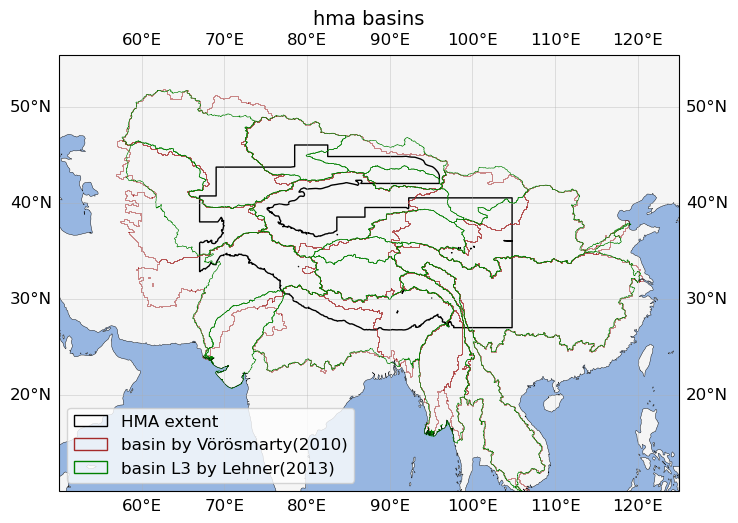

In [5]:
plt.rcParams.update({'font.size':12})
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([50.0, 125.0, 10, 49])
# ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
hma_gtng_merged.plot(ax=ax, 
                     edgecolor='black', 
                     facecolor='none', 
                     legend=True, 
                     linewidth=1)
hma_basins_vörösmarty2010.plot(ax=ax, 
                               edgecolor='brown', 
                               facecolor='none',  
                               legend=True, 
                               linewidth=0.4)
hma_basins_lehner2013_l3.plot(ax=ax, 
                              edgecolor='green', 
                              facecolor='none', 
                              linewidth=0.4)

## add auxiliary features
ax.add_feature(cfeature.LAND, facecolor='WhiteSmoke')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3, edgecolor='black')

## add legend
legend_patches = [
    mpatches.Patch(edgecolor='black', facecolor='none', label='HMA extent', linewidth=1),
    mpatches.Patch(edgecolor='brown', facecolor='none', label='basin by Vörösmarty(2010)', linewidth=1),
    mpatches.Patch(edgecolor='green', facecolor='none', label='basin L3 by Lehner(2013) ', linewidth=1)
]
ax.legend(handles=legend_patches, loc='lower left')

ax.set_title('hma basins', fontsize=14)
# plt.savefig('figures/hma-extent/hma_hydro_basins.png', bbox_inches='tight', dpi=200)


#### lehner2013 basins at different level

Text(0.5, 1.0, 'hma basins')

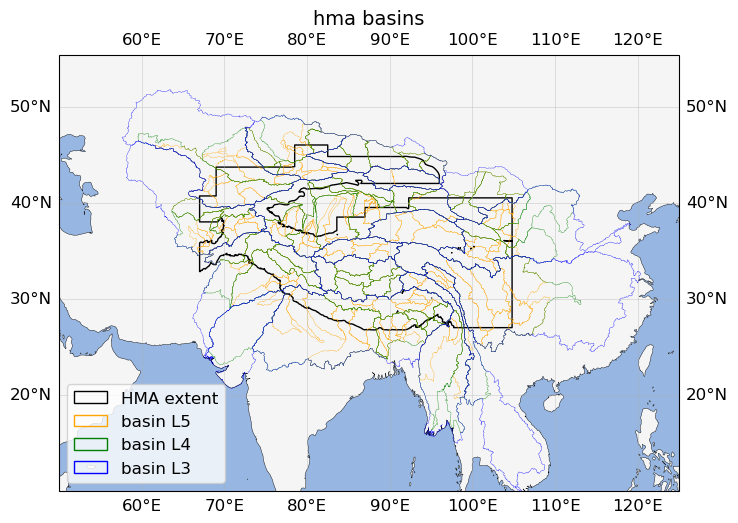

In [6]:
plt.rcParams.update({'font.size':12})
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([50.0, 125.0, 10, 49])
# ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
hma_gtng_merged.plot(ax=ax, 
                     edgecolor='black', 
                     facecolor='none', 
                     legend=True, 
                     linewidth=1)
hma_basins_lehner2013_l5.plot(ax=ax, 
                              edgecolor='orange', 
                              facecolor='none', 
                              linewidth=0.2)
hma_basins_lehner2013_l4.plot(ax=ax,
                              edgecolor='green', 
                              facecolor='none', 
                              linewidth=0.2)
hma_basins_lehner2013_l3.plot(ax=ax, 
                              edgecolor='blue', 
                              facecolor='none', 
                              linewidth=0.2)

## add auxiliary features
ax.add_feature(cfeature.LAND, facecolor='WhiteSmoke')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3, edgecolor='black')

## add legend
legend_patches = [
    mpatches.Patch(edgecolor='black', facecolor='none', label='HMA extent', linewidth=1),
    mpatches.Patch(edgecolor='orange', facecolor='none', label='basin L5', linewidth=1),
    mpatches.Patch(edgecolor='green', facecolor='none', label='basin L4', linewidth=1),
    mpatches.Patch(edgecolor='blue', facecolor='none', label='basin L3', linewidth=1)
                ]
ax.legend(handles=legend_patches, loc='lower left')

ax.set_title('hma basins', fontsize=14)
# plt.savefig('figures/hma-extent/hma_hydro_basin_levels.png', bbox_inches='tight', dpi=200)
